In [1]:
import pandas as pd
import numpy as np
import collections as cols
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler 

# Cargar el archivo CSV
file_path = 'databases/Base de datos para desarrollo v2.csv'
df = pd.read_csv(file_path)
print(df)
print(df.columns)

        var001       var002              var005 _temperatura_cat   _pulso_cat  \
0            1  U0003670130  01jan2021 00:27:00           Normal       Normal   
1            2  U0003670132  01jan2021 00:29:00           Normal       Normal   
2            3  U0003670154  01jan2021 01:21:00           Normal       Normal   
3            4  U0003670170  01jan2021 02:02:00           Fiebre  Taquicardia   
4            5  U0003670177  01jan2021 02:31:00           Normal       Normal   
...        ...          ...                 ...              ...          ...   
116565  238743  U0005201899  31dec2023 21:04:59           Normal       Normal   
116566  238745  U0005201918  31dec2023 21:45:00           Normal       Normal   
116567  238746  U0005201934  31dec2023 22:12:59           Normal       Normal   
116568  238747  U0005201936  31dec2023 22:17:00           Normal       Normal   
116569  238749  U0005201969  31dec2023 23:28:00           Normal       Normal   

               _pas_cat    

/tmp/ipykernel_87820/816290584.py:10: DtypeWarning: Columns (30) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


In [2]:
# Paso 1: Eliminar las columnas no útiles
df_cleaned = df[['__temperatura','__pulso','__pas','__pad','__sat02','__destino', '__categ_fin']].copy()
print(df_cleaned)

# Eliminar las filas donde '__destino' y '__categ_fin' es NaN
df_cleaned = df_cleaned.dropna(subset=['__destino', '__categ_fin'])
# Rellenar los datos NaN por 0
df_cleaned = df_cleaned.fillna(0)

# Verificar que se eliminaron
print(df_cleaned.isnull().sum())
print(df_cleaned)


        __temperatura __pulso __pas  __pad __sat02  __destino __categ_fin
0           35.799999      85   174   87.0      98  Domicilio          C4
1           36.500000      87   118   82.0      99  Domicilio          C4
2           35.700001      93   159   99.0     100  Domicilio          C4
3           38.799999     159   NaN    NaN     100  Domicilio          C3
4           36.299999      83   NaN    NaN      96  Domicilio          C4
...               ...     ...   ...    ...     ...        ...         ...
116565            NaN      89   119   63.0      99  Domicilio          C4
116566            NaN     100   127   68.0      99  Domicilio          C3
116567            NaN      72   135   73.0      98  Domicilio          C4
116568            NaN      80   139   68.0      99  Domicilio          C4
116569            NaN      85   154   92.0      99  Domicilio          C4

[116570 rows x 7 columns]
__temperatura    0
__pulso          0
__pas            0
__pad            0
__sat02  

In [3]:
# Convertir las columnas que se encuentran como objeto a numéricas
# Columnas a convertir
columns_to_convert = ['__pas', '__pulso', '__sat02']

# Convertir las columnas a float64
for column in columns_to_convert:
    df_cleaned[column] = pd.to_numeric(df_cleaned[column], errors='coerce').astype('float64')


# Convertir las columnas categóricas a valores numéricos usando Label Encoding
print(df_cleaned['__destino'].unique())
print(df_cleaned['__categ_fin'].unique())

# Crear una copia del DataFrame para almacenar los mapeos
category_mappings = {}

label_encoders = {}
for column in ['__destino', '__categ_fin']:
    le = LabelEncoder()
    df_cleaned[column] = le.fit_transform(df_cleaned[column].astype(str)) + 1
    label_encoders[column] = le
    
    category_mappings[column] = pd.DataFrame({
        'Categórico': le.classes_,
        'Numérico': range(1, len(le.classes_) + 1)
    })

print(df_cleaned)

print("Mapeo para '__destino':")
print(category_mappings['__destino'])

print("Mapeo para '__categ_fin':")
print(category_mappings['__categ_fin'])

['Domicilio' 'Hospitalización domiciliaria' 'Derivación'
 'Carabineros o PDI' 'Hospitalización' 'Otros']
['C4' 'C3' 'C2' 'C5' 'C1']
        __temperatura  __pulso  __pas  __pad  __sat02  __destino  __categ_fin
0           35.799999     85.0  174.0   87.0     98.0          3            4
1           36.500000     87.0  118.0   82.0     99.0          3            4
2           35.700001     93.0  159.0   99.0    100.0          3            4
3           38.799999    159.0    0.0    0.0    100.0          3            3
4           36.299999     83.0    0.0    0.0     96.0          3            4
...               ...      ...    ...    ...      ...        ...          ...
116565       0.000000     89.0  119.0   63.0     99.0          3            4
116566       0.000000    100.0  127.0   68.0     99.0          3            3
116567       0.000000     72.0  135.0   73.0     98.0          3            4
116568       0.000000     80.0  139.0   68.0     99.0          3            4
116569    

In [4]:
print("Datos ordenada por Destino")
sorted_df_dest = df_cleaned.sort_values('__destino')
print(sorted_df_dest)

print("Datos ordenada por Categoría")
sorted_df_dest = df_cleaned.sort_values('__categ_fin')
print(sorted_df_dest)

Datos ordenada por Destino
        __temperatura  __pulso  __pas  __pad  __sat02  __destino  __categ_fin
34031       36.500000    121.0  198.0  112.0     98.0          1            3
41664       36.500000     94.0    0.0    0.0     99.0          1            3
99296       36.400002     74.0  147.0   81.0     99.0          1            4
1450        36.500000    120.0  173.0  103.0    100.0          1            3
79296       35.500000     87.0  114.0   83.0     98.0          1            5
...               ...      ...    ...    ...      ...        ...          ...
32773       36.400002     84.0    0.0    0.0     99.0          6            3
105104      36.000000     80.0  117.0   81.0    100.0          6            2
9298        36.299999    162.0   93.0   65.0     96.0          6            2
33265       36.200001     95.0  119.0   73.0     97.0          6            3
32435       36.400002    145.0    0.0    0.0    100.0          6            4

[101579 rows x 7 columns]
Datos orde

In [5]:
print("DESTINO")
features = ['__temperatura', '__pulso', '__pas', '__pad', '__sat02', '__categ_fin']
target = '__destino'

# Calcular la correlación de las características con '__destino'
correlations = df_cleaned[features + [target]].corr()

# Mostrar la correlación de cada característica con '__destino'
print(correlations[target].sort_values(ascending=False))

# Seleccionar solo las columnas de interés
print("CATEGORÍA")
features = ['__temperatura', '__pulso', '__pas', '__pad', '__sat02', '__destino']
target = '__categ_fin'

# Calcular la correlación de las características con '__categ_fin'
correlations = df_cleaned[features + [target]].corr()

# Mostrar la correlación de cada característica con '__categ_fin'
print(correlations[target].sort_values(ascending=False))

DESTINO
__destino        1.000000
__categ_fin      0.008089
__pas            0.000730
__temperatura   -0.000844
__pulso         -0.001742
__sat02         -0.002288
__pad           -0.002310
Name: __destino, dtype: float64
CATEGORÍA
__categ_fin      1.000000
__temperatura    0.105843
__sat02          0.035068
__destino        0.008089
__pad           -0.044847
__pas           -0.057632
__pulso         -0.123074
Name: __categ_fin, dtype: float64


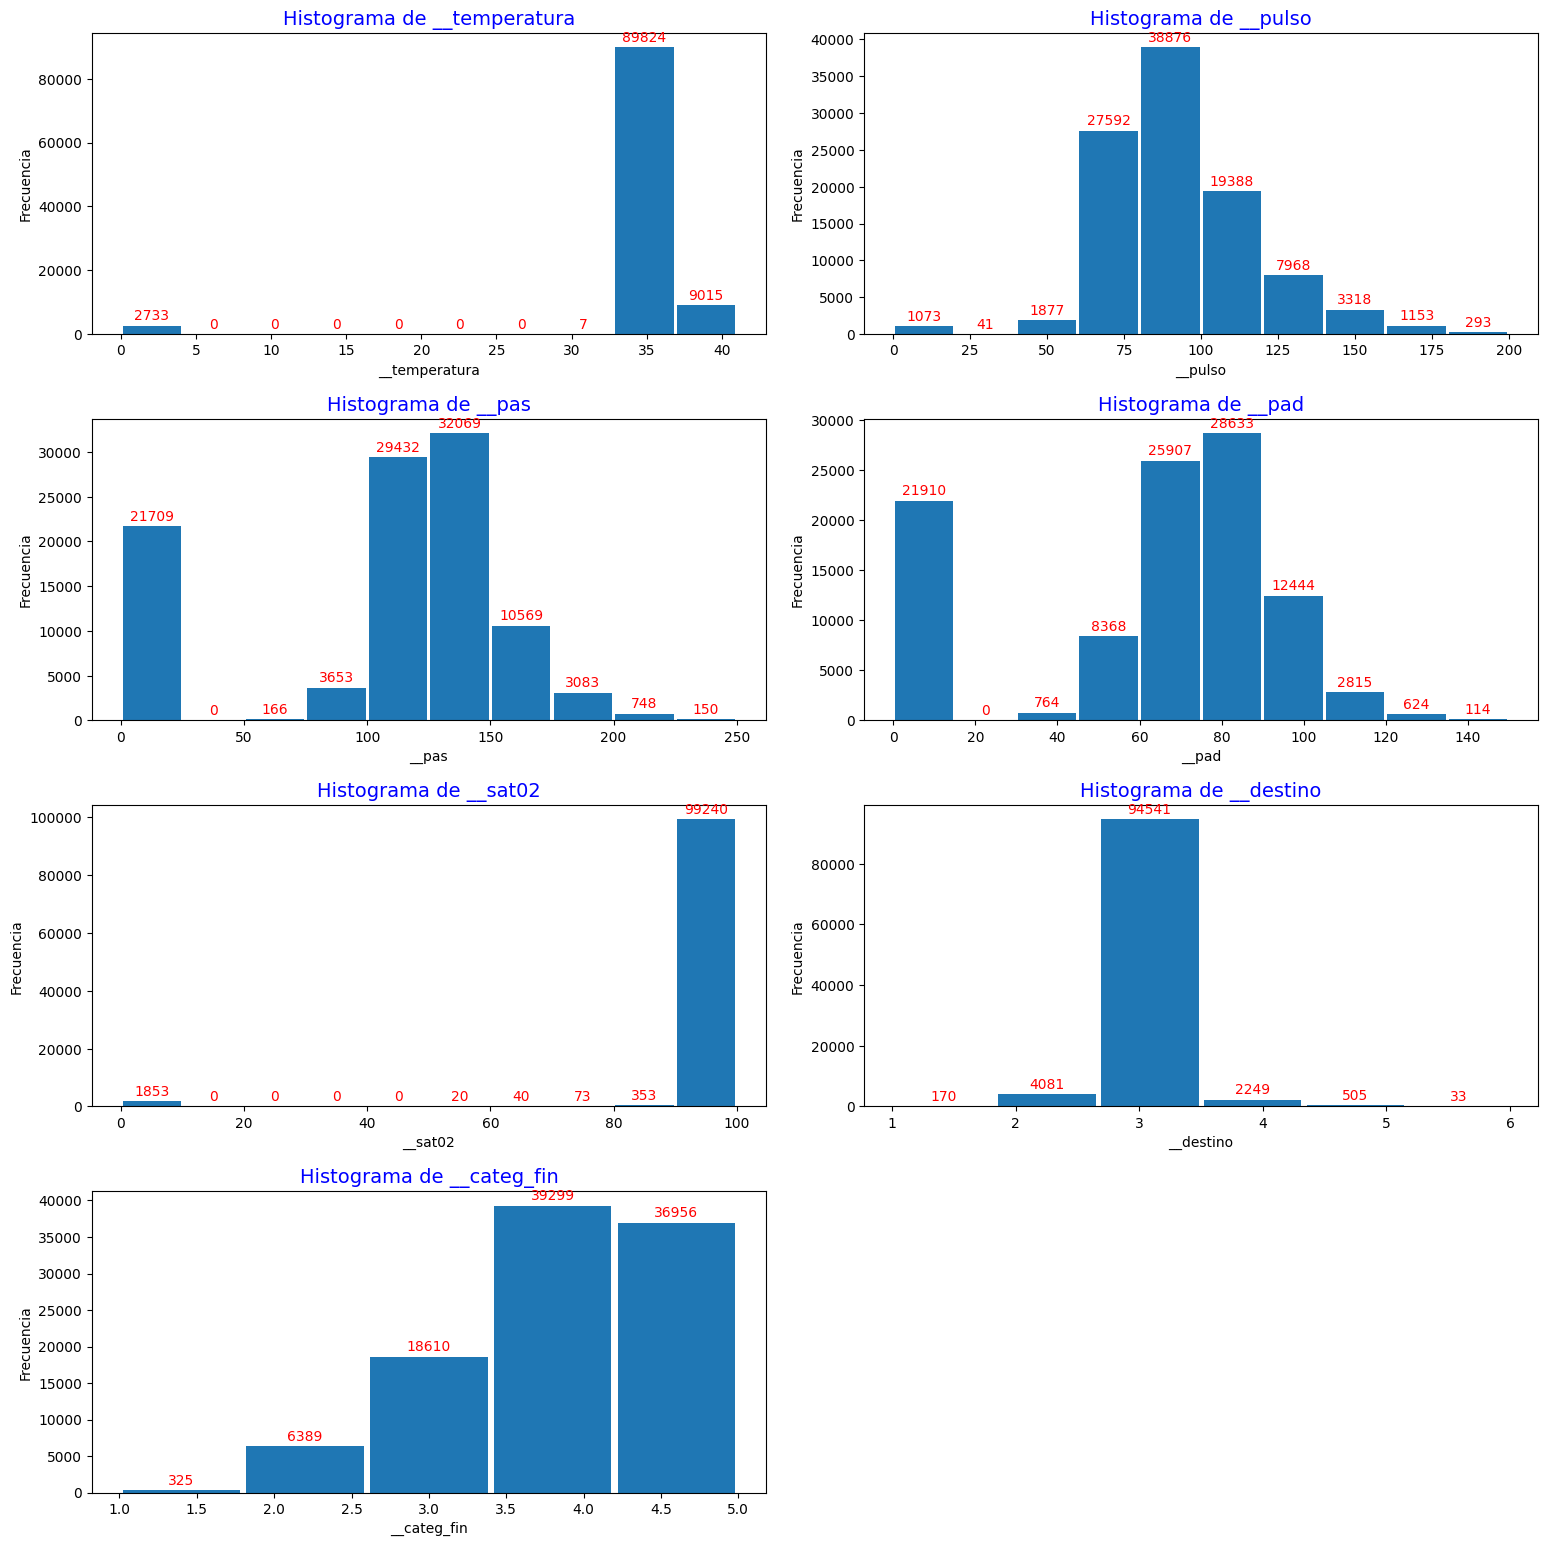

In [6]:
# Histogramas
font2 = {'family': 'sans-serif',
        'color':  'blue',
        'weight': 'normal',
        'size': 14,
        }

# Determinar el número de filas necesarias
num_columns = 2
num_rows = (len(df_cleaned.columns) + num_columns - 1) // num_columns  # Calcular el número de filas necesarias

# Crear una cuadrícula de gráficos
fig, axes = plt.subplots(nrows=num_rows, ncols=num_columns, figsize=(16, num_rows * 4))

# Ajustar el espacio entre gráficos
fig.tight_layout(pad=4.0)

# Iterar sobre las columnas y crear gráficos
for i, column in enumerate(df_cleaned.columns):
    row = i // num_columns
    col = i % num_columns
    ax = axes[row, col]

    # Calcular el número de bins basado en valores únicos
    unique_values = df_cleaned[column].nunique()
    bins = unique_values if unique_values <= 12 else 10

    n, bins, patches = ax.hist(df_cleaned[column], bins=bins, rwidth=0.95)
    ax.set_xlabel(column)
    ax.set_ylabel('Frecuencia')
    ax.set_title(f'Histograma de {column}', fontdict=font2)

    # Añadir texto sobre cada barra del histograma
    for patch, count in zip(patches, n):
        height = patch.get_height()
        ax.annotate(f'{int(count)}', 
                    xy=(patch.get_x() + patch.get_width() / 2, height),
                    xytext=(0, 2),  # 3 puntos de desplazamiento hacia arriba
                    textcoords="offset points",
                    ha='center', va='bottom', 
                    color='red', fontsize=10)

# Eliminar los ejes vacíos
for i in range(len(df_cleaned.columns), num_rows * num_columns):
    fig.delaxes(axes.flatten()[i])


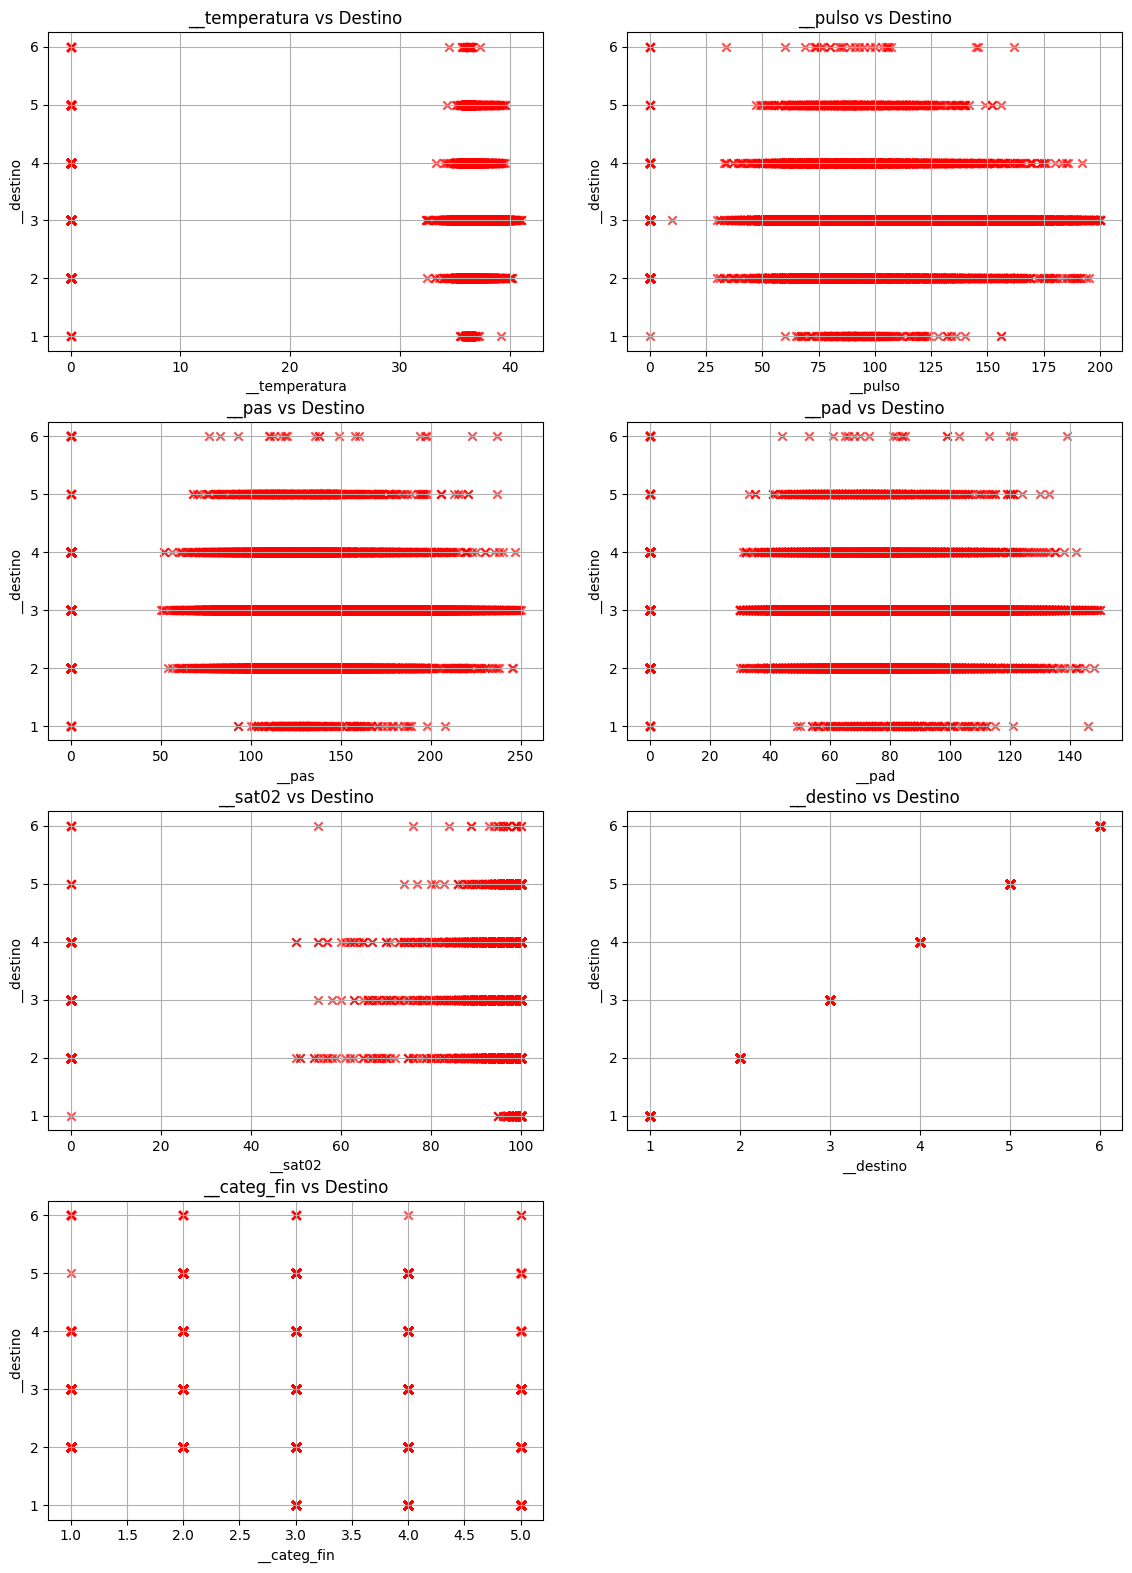

In [7]:
# Lista de columnas que queremos graficar contra '__categorizacion'
columns_to_plot = ['__temperatura', '__pulso', 
                   '__pas', '__pad', '__sat02',
                   '__destino', '__categ_fin']

# Determinar el número de filas necesarias
num_columns = 2
num_rows = (len(columns_to_plot) + num_columns - 1) // num_columns  # Calcular el número de filas necesarias

# Crear una cuadrícula de gráficos
fig, axes = plt.subplots(nrows=num_rows, ncols=num_columns, figsize=(12, num_rows * 4))

# Ajustar el espacio entre gráficos
fig.tight_layout(pad=3.0)

# Iterar sobre las columnas y crear gráficos
for i, column in enumerate(columns_to_plot):
    row = i // num_columns
    col = i % num_columns
    ax = axes[row, col]
        
    ax.scatter(df_cleaned[column], df_cleaned['__destino'], alpha=0.7, marker='x', color = "red")
    ax.set_xlabel(column)
    ax.set_ylabel('__destino')
    ax.set_title(f'{column} vs Destino')
    ax.grid(True)

# Eliminar los ejes vacíos
for i in range(len(columns_to_plot), num_rows * num_columns):
    fig.delaxes(axes.flatten()[i])

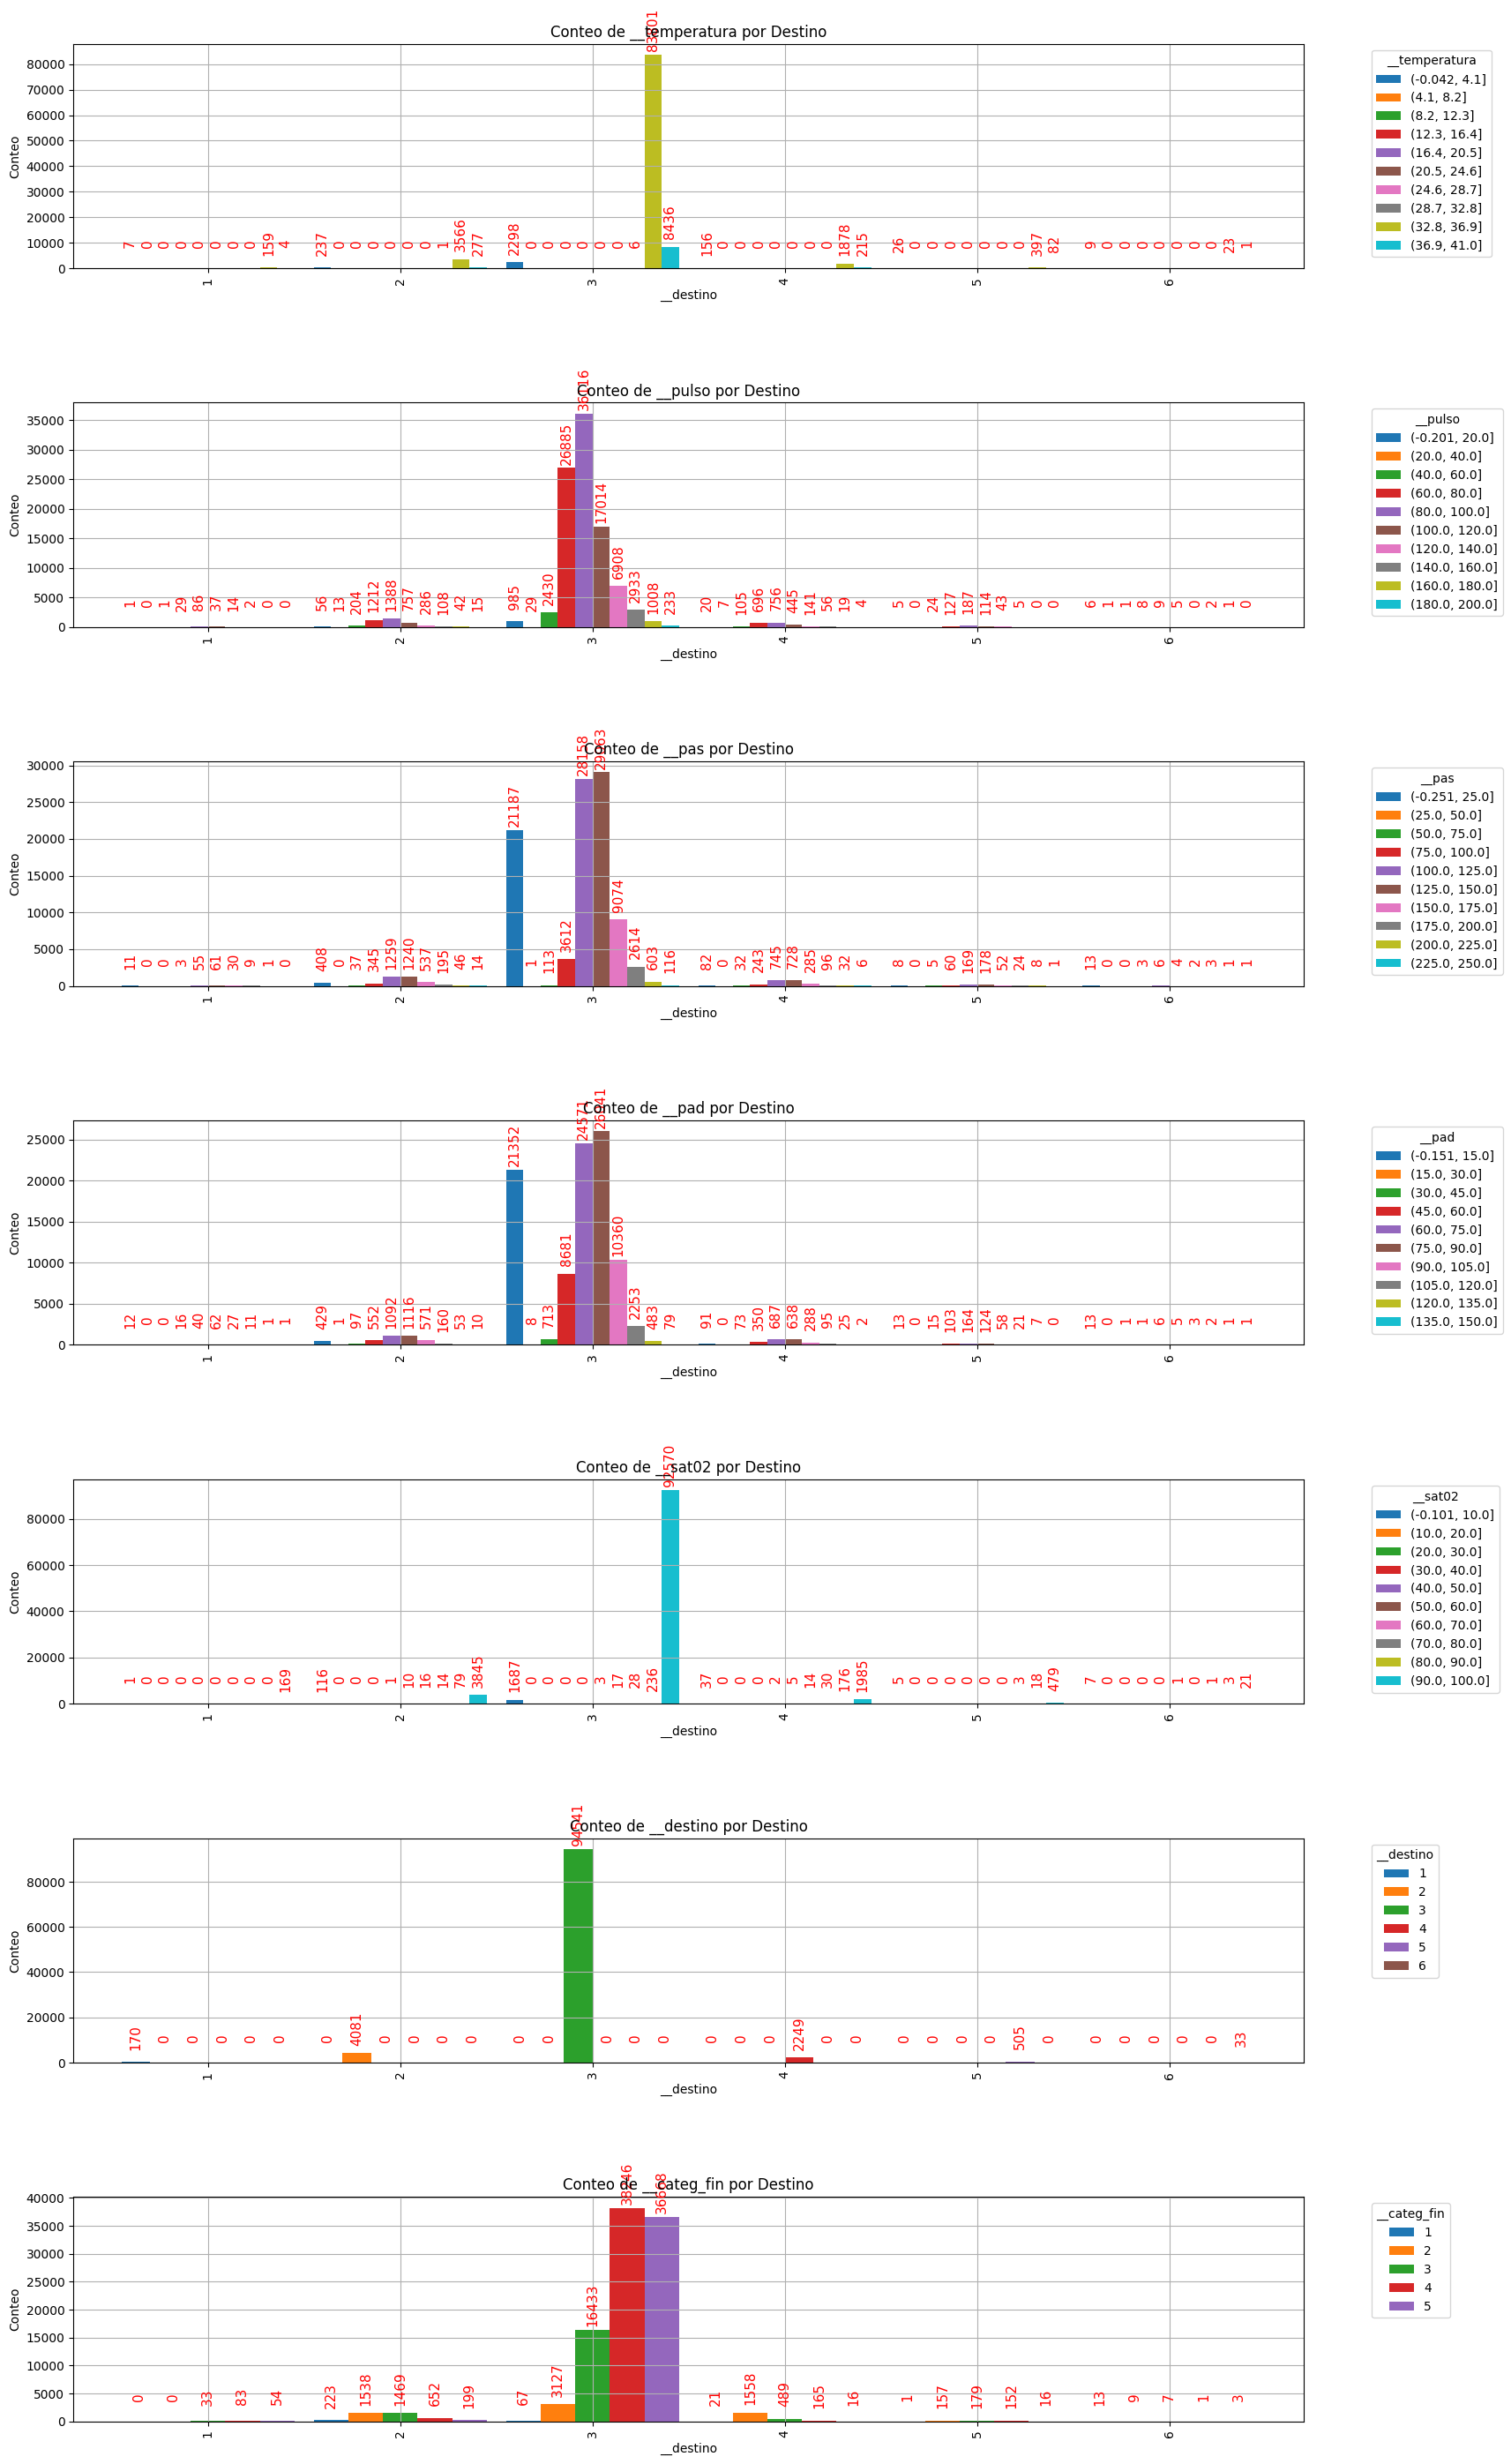

In [9]:

# Lista de columnas para las cuales queremos crear gráficos de barras
columns_to_plot = ['__temperatura', '__pulso', 
                   '__pas', '__pad', '__sat02', 
                   '__destino', '__categ_fin']

# Crear una figura para los gráficos
fig = plt.figure(figsize=(18, len(columns_to_plot) * 5))
fig.subplots_adjust(hspace=0.6)  # Más espacio entre los gráficos
#fig.tight_layout(pad=8.0)

# Iterar sobre las columnas y crear gráficos de barras apiladas
for idx, column in enumerate(columns_to_plot):
    ax = fig.add_subplot(len(columns_to_plot), 1, idx + 1)

    # Verificar el número de valores únicos en la columna
    unique_values = df_cleaned[column].nunique()

    # Agrupar valores en bins si hay más de 12 valores únicos
    if unique_values > 12:
        # Crear bins para los valores
        df_cleaned[column+'_binned'] = pd.cut(df_cleaned[column], bins=10, include_lowest=True)
        # Agrupar y contar los valores binned en función de '__categorizacion'
        counts = df_cleaned.groupby(['__destino', column+'_binned']).size().unstack(fill_value=0)
    else:
        # Agrupar y contar los valores en función de '__categorizacion'
        counts = df_cleaned.groupby(['__destino', column]).size().unstack(fill_value=0)
    
    # Crear gráfico de barras
    bar_plot = counts.plot(kind='bar', stacked=False, ax=ax, width=0.9)  # Aumentar el grosor de las barras

    # Añadir etiquetas de valores encima de cada barra
    for p in bar_plot.patches:
        bar_plot.annotate(
            str(p.get_height()), 
            (p.get_x() + p.get_width() / 2., p.get_height()), 
            ha='center', 
            va='center', 
            fontsize=11, 
            color='red', 
            rotation=90,  # Rotación de 90 grados
            xytext=(0, 20), 
            textcoords='offset points'
        )

    # Ajustar los ejes y el título
    ax.set_xlabel('__destino')
    ax.set_ylabel('Conteo')
    ax.set_title(f'Conteo de {column} por Destino')
    ax.grid(True)

    # Colocar la leyenda fuera del gráfico, a la derecha
    ax.legend(title=column, bbox_to_anchor=(1.05, 1), loc='upper left')


# Mostrar la cuadrícula de gráficos
plt.show()


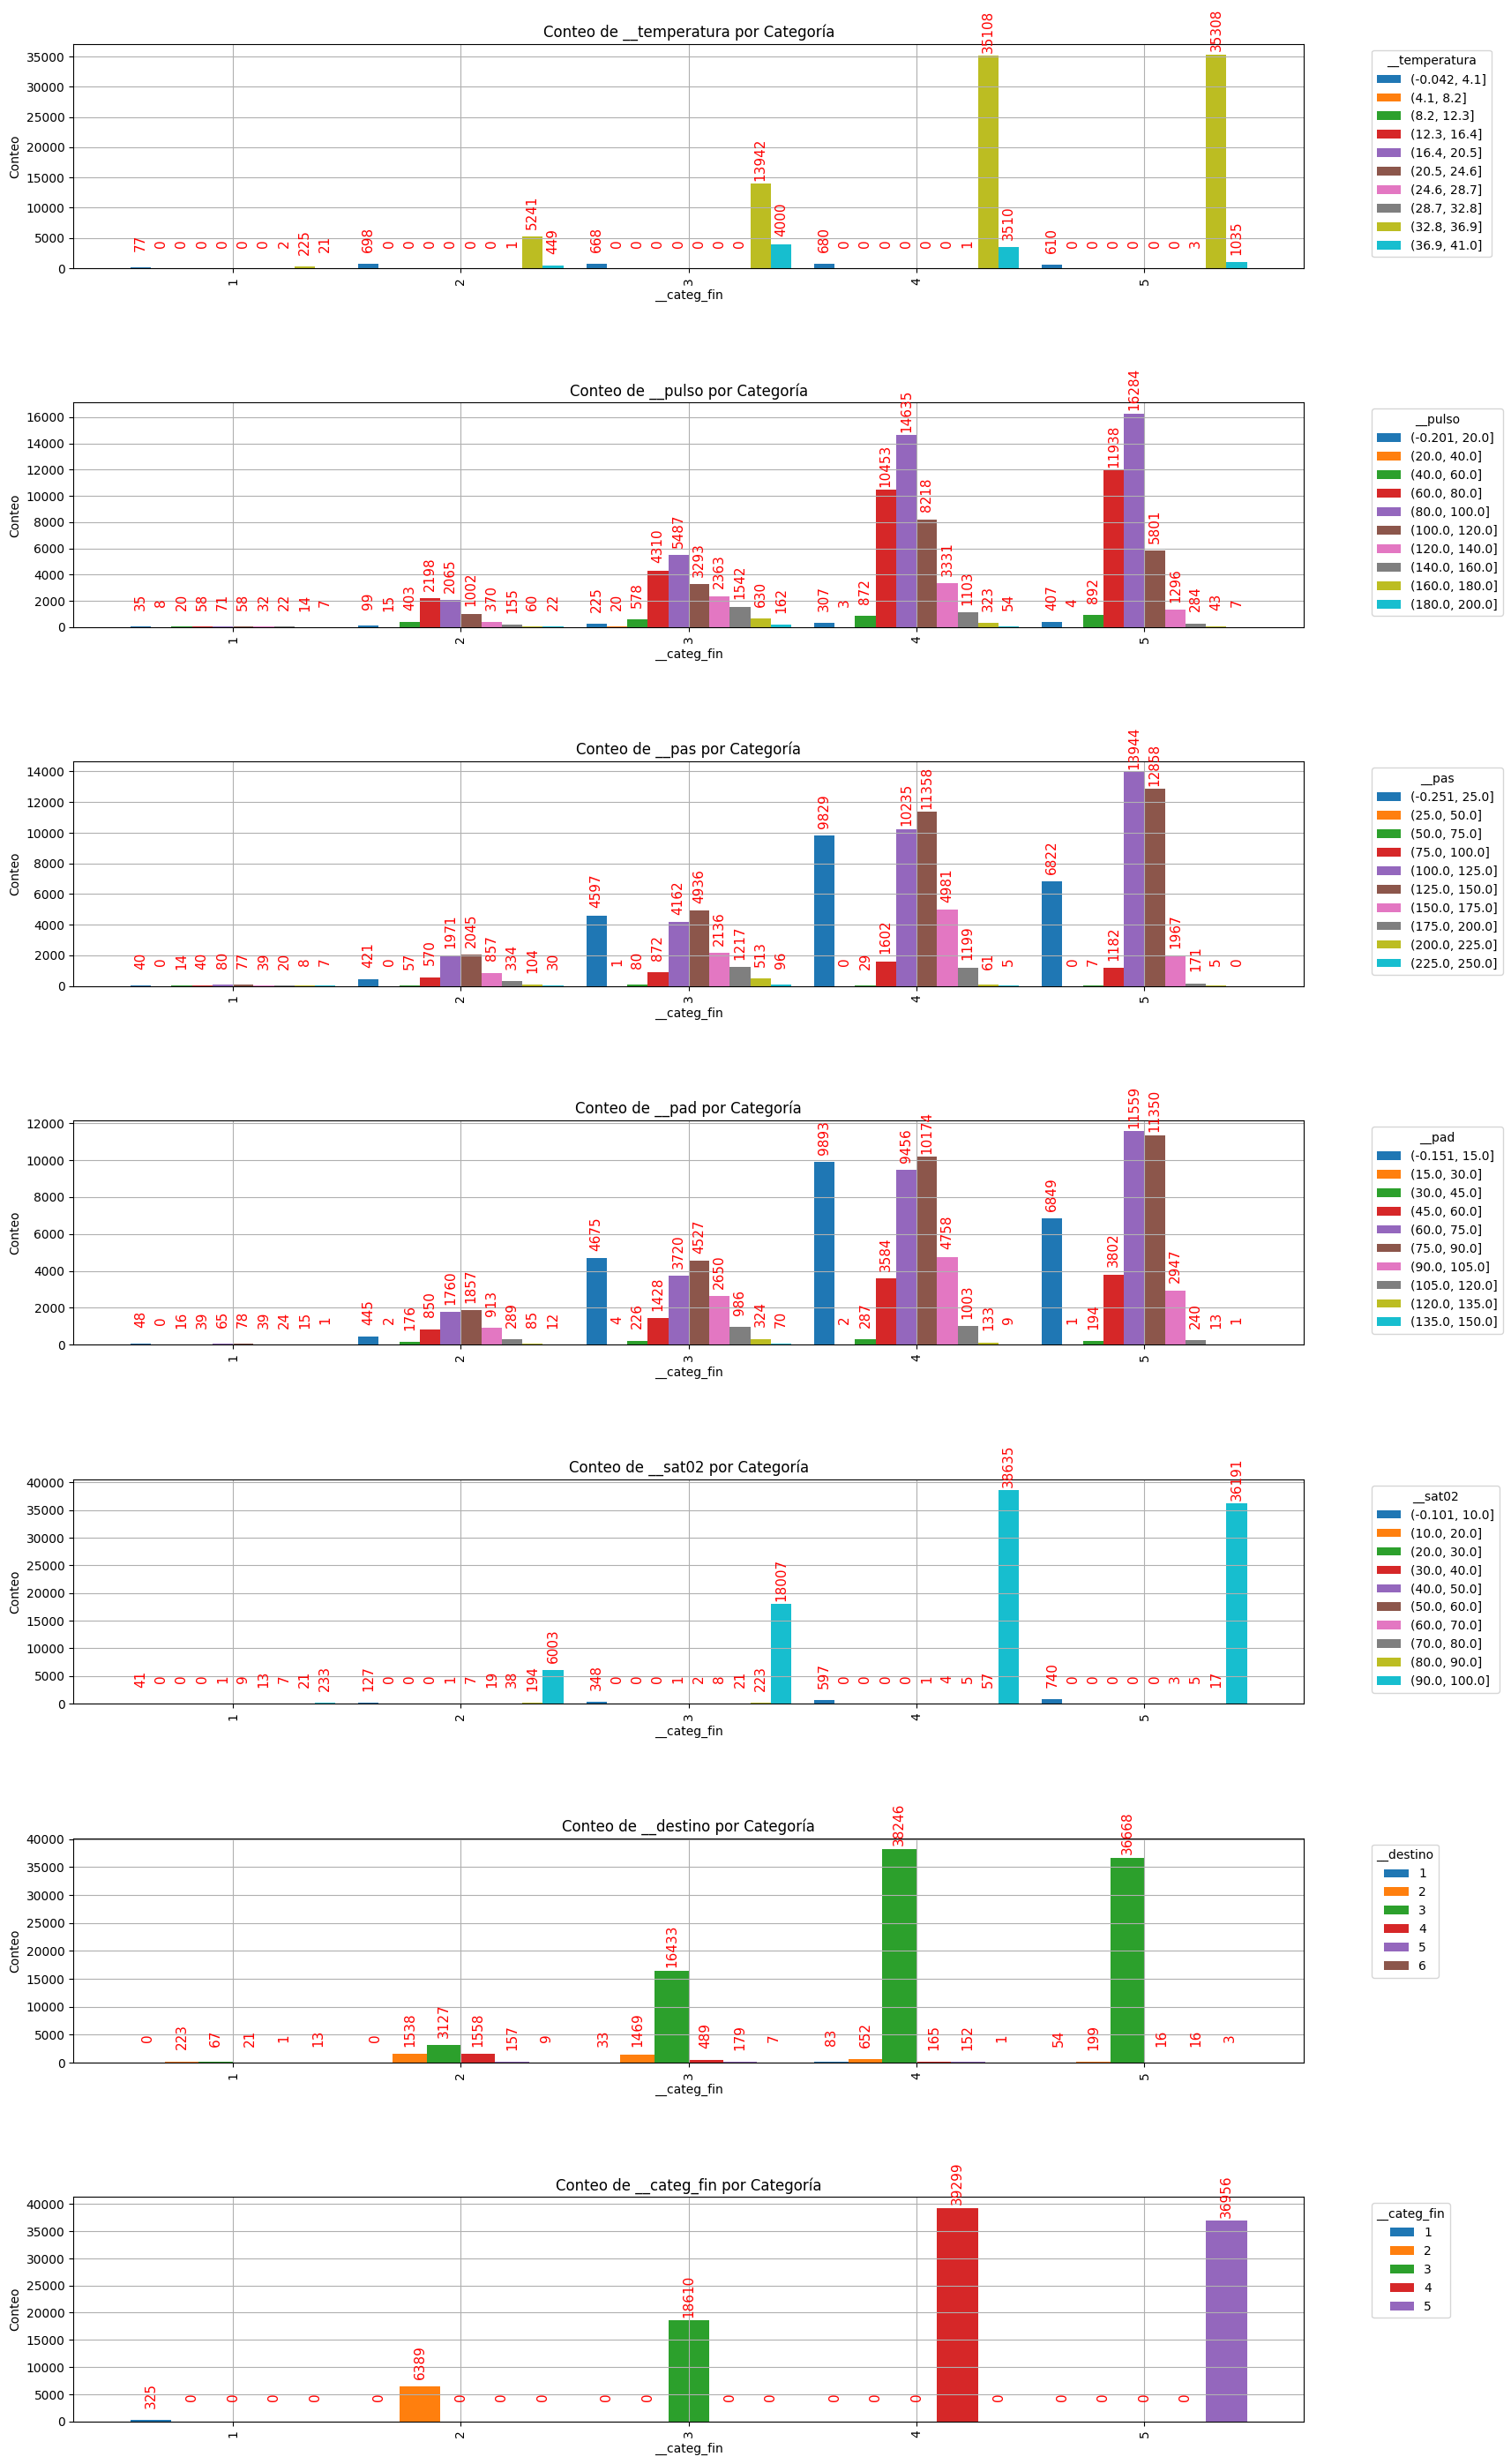

In [11]:

# Lista de columnas para las cuales queremos crear gráficos de barras
columns_to_plot = ['__temperatura', '__pulso', 
                   '__pas', '__pad', '__sat02', 
                   '__destino', '__categ_fin']

# Crear una figura para los gráficos
fig = plt.figure(figsize=(18, len(columns_to_plot) * 5))
fig.subplots_adjust(hspace=0.6)  # Más espacio entre los gráficos
#fig.tight_layout(pad=8.0)

# Iterar sobre las columnas y crear gráficos de barras apiladas
for idx, column in enumerate(columns_to_plot):
    ax = fig.add_subplot(len(columns_to_plot), 1, idx + 1)

    # Verificar el número de valores únicos en la columna
    unique_values = df_cleaned[column].nunique()

    # Agrupar valores en bins si hay más de 12 valores únicos
    if unique_values > 12:
        # Crear bins para los valores
        df_cleaned[column+'_binned'] = pd.cut(df_cleaned[column], bins=10, include_lowest=True)
        # Agrupar y contar los valores binned en función de '__categorizacion'
        counts = df_cleaned.groupby(['__categ_fin', column+'_binned']).size().unstack(fill_value=0)
    else:
        # Agrupar y contar los valores en función de '__categorizacion'
        counts = df_cleaned.groupby(['__categ_fin', column]).size().unstack(fill_value=0)
    
    # Crear gráfico de barras
    bar_plot = counts.plot(kind='bar', stacked=False, ax=ax, width=0.9)  # Aumentar el grosor de las barras

    # Añadir etiquetas de valores encima de cada barra
    for p in bar_plot.patches:
        bar_plot.annotate(
            str(p.get_height()), 
            (p.get_x() + p.get_width() / 2., p.get_height()), 
            ha='center', 
            va='center', 
            fontsize=11, 
            color='red', 
            rotation=90,  # Rotación de 90 grados
            xytext=(0, 20), 
            textcoords='offset points'
        )

    # Ajustar los ejes y el título
    ax.set_xlabel('__categ_fin')
    ax.set_ylabel('Conteo')
    ax.set_title(f'Conteo de {column} por Categoría')
    ax.grid(True)

    # Colocar la leyenda fuera del gráfico, a la derecha
    ax.legend(title=column, bbox_to_anchor=(1.05, 1), loc='upper left')


# Mostrar la cuadrícula de gráficos
plt.show()
